<a href="https://colab.research.google.com/github/aleena999/wbc_deepLearning/blob/main/WBC_CNNKhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/MrKhan0747/Blood-Cell-Subtypes-Classification.git

In [2]:
#!unzip /content/Blood-Cell-Subtypes-Classification/dataset2-master.zip

In [1]:
#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [2]:
#TRAIN AND TEST DATASET ADDRESS
DATASET="../images/deep_yolov5pytorch/Train"
TEST_DATASET="../images/deep_yolov5pytorch/Test"

#Categroized images
#4 types of subcells
CATEGORIES=["fractured","non-fractured"]



../images/deep_yolov5pytorch/Train/fractured
253_jpg.rf.08841915981ed1756a556a3cd9ae7b33.jpg


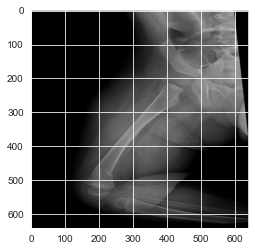

../images/deep_yolov5pytorch/Train/non-fractured
196_jpg.rf.5c1a2c10cb8bc115c3bc510b4b6b0e68.jpg


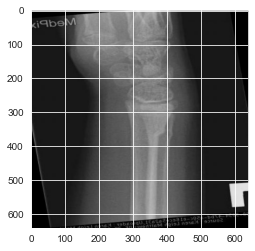

In [3]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        print(path)
        for img_file in os.listdir(path):
            print(img_file)
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder


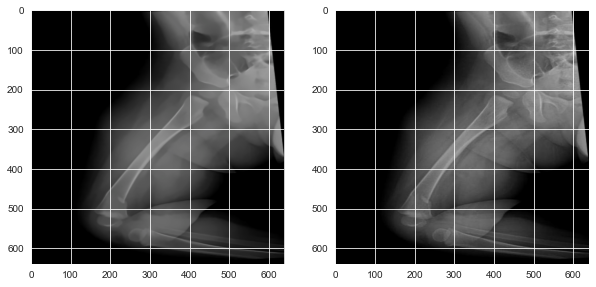

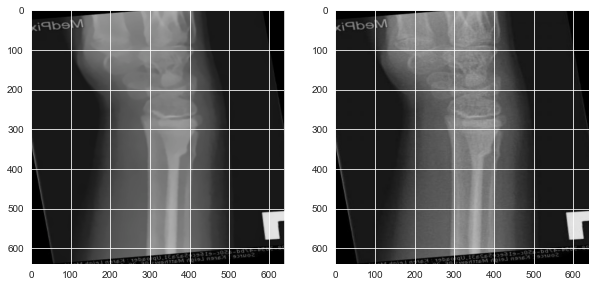

In [4]:

#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            #image convert to smaller pixels 60*60
            #print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder



In [6]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])



In [7]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])



In [8]:
#print total data in train and test
print(len(train_data))
print(len(test_data))



801
200


In [9]:
#shuffle the dataset fo good result

import random

random.shuffle(train_data)
random.shuffle(test_data)



In [10]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])



0
0
0
1
0
0
0
0
0
0


In [11]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)



(801, 801)

In [12]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)



(200, 200)

In [13]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0



(801, 60, 60, 3)

In [14]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0



(200, 60, 60, 3)

/Users/kosrat/projects/ml/fracture-detection/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

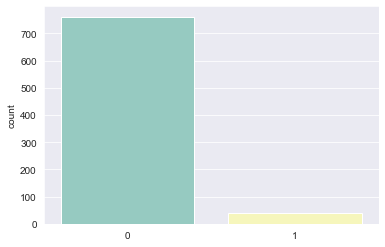

In [15]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data 

In [16]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [17]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

#build the models
#import Keras libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,AveragePooling2D,MaxPooling2D,Dropout,Activation

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
          
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0

2023-07-15 22:29:49.900681: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
#lets split the 20% train dataset for validation 
hist=model.fit(train_X,one_hot_train,epochs=100,batch_size=32,validation_split=0.2)


Epoch 1/100
20/20 [==============================] - 3s 113ms/step - loss: 0.2811 - accuracy: 0.9500 - val_loss: 0.2693 - val_accuracy: 0.9317
Epoch 2/100
20/20 [==============================] - 2s 101ms/step - loss: 0.1905 - accuracy: 0.9547 - val_loss: 0.2537 - val_accuracy: 0.9317
Epoch 3/100
20/20 [==============================] - 2s 107ms/step - loss: 0.1932 - accuracy: 0.9547 - val_loss: 0.3023 - val_accuracy: 0.9317
Epoch 4/100
20/20 [==============================] - 2s 104ms/step - loss: 0.1872 - accuracy: 0.9547 - val_loss: 0.2685 - val_accuracy: 0.9317
Epoch 5/100
20/20 [==============================] - 2s 110ms/step - loss: 0.1913 - accuracy: 0.9547 - val_loss: 0.3208 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 2s 109ms/step - loss: 0.1844 - accuracy: 0.9547 - val_loss: 0.2671 - val_accuracy: 0.9317
Epoch 7/100
20/20 [==============================] - 2s 112ms/step - loss: 0.1956 - accuracy: 0.9547 - val_loss: 0.3125 - val_accuracy: 0.9317

7/7 [==============================] - 0s 18ms/step - loss: 1.1454 - accuracy: 0.9450


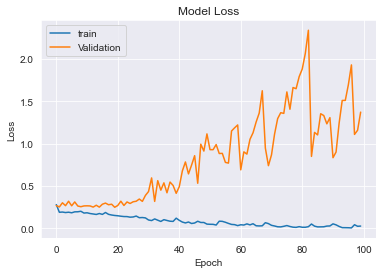

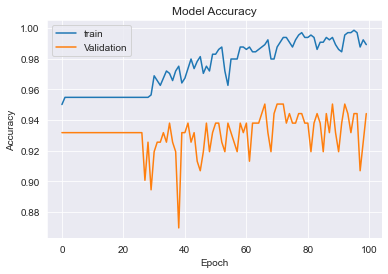

In [20]:
#model evaluation
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

#train and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()
